### here we run through calculate for all ml dataset as set in 


In [ ]:
import prepare_ml_dataset
import importlib
importlib.reload(prepare_ml_dataset)

prepare_ml_dataset.prepare_ml_dataset_batch(recalc=False,plot_data=True,save_data=True, skip_loading = True)

/home/jliao/anaconda3/envs/notebook/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-04-04 10:43:08.260954: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-04 10:43:08.264918: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-04 10:43:08.653906: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with

output_rel05/ml_data/symh_asyh_ae_asyd_history7days_dL01True_forecastall/h_972237_x_train.csv exists 
output_rel05/ml_data/symh_asyh_ae_asyd_history7days_dL01True_forecastall/h_51767680_x_train.csv exists 
output_rel05/ml_data/symh_asyh_ae_asyd_history7days_dL01True_forecastall/o_972237_x_train.csv exists 
output_rel05/ml_data/symh_asyh_ae_asyd_history7days_dL01True_forecastall/o_51767680_x_train.csv exists 
output_rel05/ml_data/symh_asyh_ae_asyd_history7days_dL01False_forecastall/h_972237_x_train.csv exists 
output_rel05/ml_data/symh_asyh_ae_asyd_history7days_dL01False_forecastall/h_51767680_x_train.csv exists 
output_rel05/ml_data/symh_asyh_ae_asyd_history7days_dL01False_forecastall/o_972237_x_train.csv exists 
output_rel05/ml_data/symh_asyh_ae_asyd_history7days_dL01False_forecastall/o_51767680_x_train.csv exists 
output_rel05/ml_data/symh_asyh_ae_asyd_history7days_dL01True_forecastindex/h_972237_x_train.csv exists 
output_rel05/ml_data/symh_asyh_ae_asyd_history7days_dL01True_forecas

### This code is for testing the load_ml_dataset.


In [ ]:

# import prepare_ml_dataset
# import importlib
# importlib.reload(prepare_ml_dataset)

# raw_feature_names =  ['symh','asyh','ae','asyd'] #['symh','asyh','asyd','ae','f10.7','kp','swp','swn','swv','by','bz']

# # [51767.680, 44428.696, 38130.120, 32724.498, 28085.268, 24103.668, 20686.558, 17753.876, 15236.896, 13076.798, 11222.936, 9631.899, 8266.406, 7094.516, 6088.722, 5225.528, 4484.742
# # , 3848.919, 3303.284, 2834.964, 2433.055, 2088.129, 1792.096, 1538.062, 1319.977, 1132.846, 972.237]
# number_history_arr = [7]
# forecast_arr = ["all"]
# dL01_arr = [True]
# species_arr = ['h']
# energy_arr = ['972237']  

# for number_history in number_history_arr:
#     for forecast in forecast_arr:
#        for dL01 in dL01_arr:
#            for species in species_arr:
#                for energy in energy_arr:
               
#                     prepare_ml_dataset.prepare_ml_dataset(energy, species, recalc = True, plot_data = True, save_data = False
#                                                           , dL01=dL01, forecast = forecast, number_history =number_history, raw_feature_names =  raw_feature_names)


### All loops together is a standard routine for create all combination of training/validation/test data for a perticular raw_feature_names setting


In [ ]:

import importlib
importlib.reload(prepare_ml_dataset)

raw_feature_names =  ['symh','asyh','ae','asyd'] #['symh','asyh','asyd','ae','f10.7','kp','swp','swn','swv','by','bz']

# [51767.680, 44428.696, 38130.120, 32724.498, 28085.268, 24103.668, 20686.558, 17753.876, 15236.896, 13076.798, 11222.936, 9631.899, 8266.406, 7094.516, 6088.722, 5225.528, 4484.742
# , 3848.919, 3303.284, 2834.964, 2433.055, 2088.129, 1792.096, 1538.062, 1319.977, 1132.846, 972.237]
number_history_arr = [7,8]
forecast_arr = ["all", "index","none"]
dL01_arr = [True, False]
species_arr = ['h', 'o']
energy_arr = ['972237', '51767680']  

for number_history in number_history_arr:
    for forecast in forecast_arr:
       for dL01 in dL01_arr:
           for species in species_arr:
               for energy in energy_arr:
               
                    prepare_ml_dataset.load_ml_dataset(energy, species, recalc = True, plot_data = False, save_data = False
                                                          , dL01=dL01, forecast = forecast, number_history =number_history, raw_feature_names =  raw_feature_names)


### This is the details for debugging load_ml_dataset

In [1]:
import prepare_fulldata
import importlib
import initialize_var
import prepare_ml_dataset

importlib.reload(prepare_fulldata)
importlib.reload(prepare_ml_dataset)
importlib.reload(initialize_var)

recalc = False
plot_data = True
save_data = True

raw_feature_names =  ['symh','asyh','ae','asyd'] #['symh','asyh','asyd','ae','f10.7','kp','swp','swn','swv','by','bz']
number_history = 7
energy = '51767680'
species = 'h'
forecast = "none"
dL01 = True
test_ts = '2017-01-01'
test_te = '2018-01-01'

dataset_csv, data_settings, directories = initialize_var.initialize_data_var(energy=energy, species=species, raw_feature_names = raw_feature_names, forecast = forecast, number_history = number_history, test_ts=test_ts, test_te=test_te, dL01=dL01)
        
df_data, directories, fulldataset_csv, fulldata_settings = prepare_fulldata.load_fulldata(energy, species, recalc = recalc, raw_feature_names = raw_feature_names, number_history = number_history, save_data = save_data, plot_data = plot_data)
        
df_full = prepare_fulldata.read_probes_data(directories["rawdata_dir"], fulldata_settings)

df_data[[fulldata_settings['doubletime_name']]] = df_full[[fulldata_settings['doubletime_name']]]

index_good = prepare_ml_dataset.get_good_index(df_full, data_settings, fulldata_settings)

if data_settings["forecast"] == "all":
    data_settings["feature_history_names"] = prepare_ml_dataset.remove_features_by_time(fulldata_settings["feature_history_names"], "*_0h")
elif data_settings["forecast"] == "index":
    data_settings["feature_history_names"] = prepare_ml_dataset.remove_index_features_by_time(fulldata_settings["feature_history_names"], "*_0h")
else:
    data_settings["feature_history_names"] = fulldata_settings["feature_history_names"]            



2025-04-04 11:08:22.269948: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-04 11:08:22.272764: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-04 11:08:22.576008: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/jliao/anaconda3/envs/notebook/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonoteb

output_rel05/fulldata/df_hope_log_o_flux_51767680
start symh
Reading from output_rel05/fulldata/df_feature_history_scaled_symh.csv
start asyh
Reading from output_rel05/fulldata/df_feature_history_scaled_asyh.csv


/home/jliao/workspace/GitHub/ml_ringcurrent_ion/prepare_fulldata.py:299: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_features_history[feature_history_names] = idf_feature_history
/home/jliao/workspace/GitHub/ml_ringcurrent_ion/prepare_fulldata.py:299: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_features_history[feature_history_names] = idf_feature_history
/home/jliao/workspace/GitHub/ml_ringcurrent_ion/prepare_fulldata.py:299: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

start ae
Reading from output_rel05/fulldata/df_feature_history_scaled_ae.csv


/home/jliao/workspace/GitHub/ml_ringcurrent_ion/prepare_fulldata.py:299: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_features_history[feature_history_names] = idf_feature_history
/home/jliao/workspace/GitHub/ml_ringcurrent_ion/prepare_fulldata.py:299: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_features_history[feature_history_names] = idf_feature_history
/home/jliao/workspace/GitHub/ml_ringcurrent_ion/prepare_fulldata.py:299: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

start asyd
Reading from output_rel05/fulldata/df_feature_history_scaled_asyd.csv


/home/jliao/workspace/GitHub/ml_ringcurrent_ion/prepare_fulldata.py:299: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_features_history[feature_history_names] = idf_feature_history
/home/jliao/workspace/GitHub/ml_ringcurrent_ion/prepare_fulldata.py:299: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_features_history[feature_history_names] = idf_feature_history
/home/jliao/workspace/GitHub/ml_ringcurrent_ion/prepare_fulldata.py:299: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

1313856 csv data for probe b


In [69]:
print(df_full.shape[0])

index_good_coor = (df_full['l'] > data_settings["l_min"]) & (df_full['l'] < data_settings["l_max"]) 

index_good_rel05 = ((df_full[fulldata_settings["datetime_name"]] < '2017-10-29') | (df_full[fulldata_settings["datetime_name"]] > '2017-11-01')) 

index_good_y = np.isfinite(df_full[data_settings["y_name"]]) # 
print(sum(index_good_coor))
print(sum(index_good_rel05))
print(sum(index_good_y))
index_good = index_good_coor & index_good_rel05 & index_good_y
print(sum(index_good))
for raw_feature_name in set(data_settings["raw_feature_names"]):
    index_good = index_good & np.isfinite(df_full[raw_feature_name])
print(sum(index_good))
if data_settings["dL01"]:
    index_dl01 = prepare_ml_dataset.get_dL01_mask(df_full)
    index_good = index_good & index_dl01
    
print(sum(index_dl01))


1313856
1313856
1312128
1115318
1113713
1113713
917048


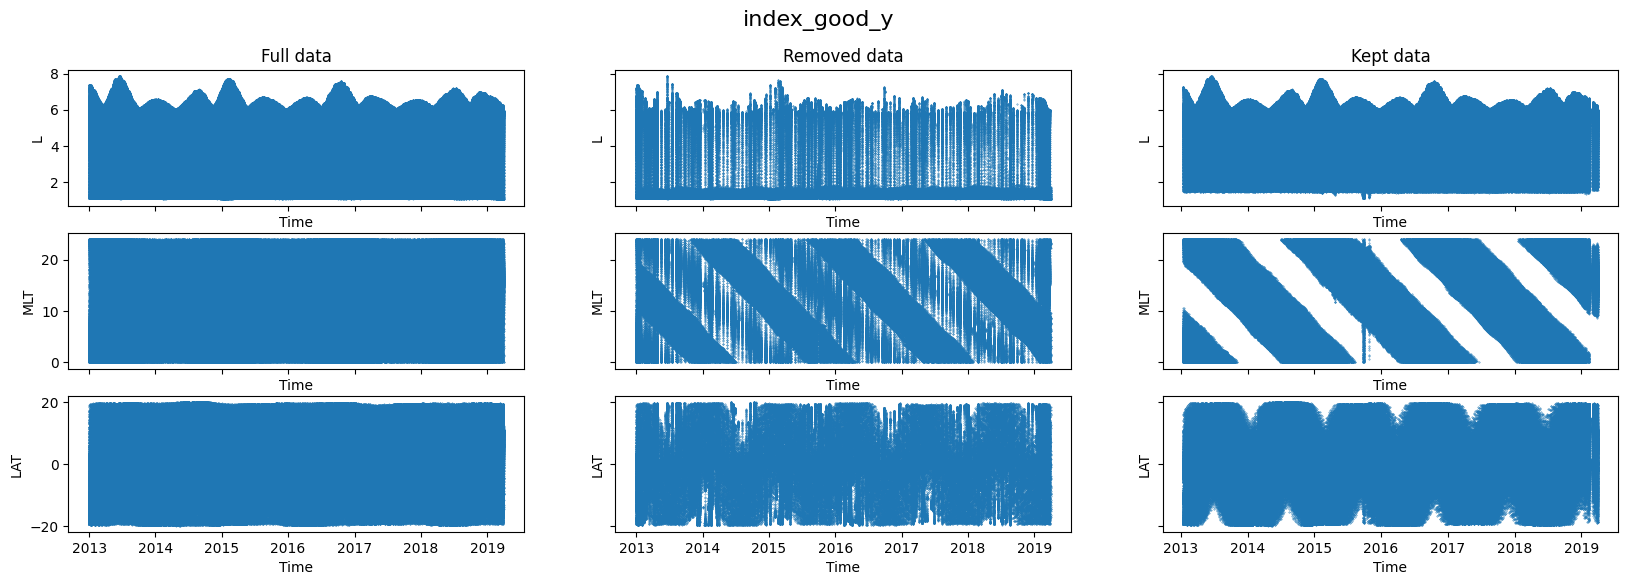

In [73]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(nrows=3, ncols=3,  sharey='row' , sharex='col', figsize=(20, 6))

fig.suptitle('index_good_y', fontsize=16)
testing_index = index_good_y

axes[0, 0].scatter(df_full.loc[:, 'DateTime'], df_full.loc[:, 'l'], s=0.1)
axes[0, 0].set_title('Full data')
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('L')

axes[0, 1].scatter(df_full.loc[~testing_index, 'DateTime'], df_full.loc[~testing_index, 'l'], s=0.1)
axes[0, 1].set_title('Removed data')
axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('L')

axes[0, 2].scatter(df_full.loc[testing_index, 'DateTime'], df_full.loc[testing_index, 'l'], s=0.1)
axes[0, 2].set_title('Kept data')
axes[0, 2].set_xlabel('Time')
axes[0, 2].set_ylabel('L')

axes[1,0].scatter(df_full.loc[:, 'DateTime'], df_full.loc[:, 'mlt'], s=0.1)
axes[1,0].set_xlabel('Time')
axes[1,0].set_ylabel('MLT')

axes[1,1].scatter(df_full.loc[~testing_index, 'DateTime'], df_full.loc[~testing_index, 'mlt'], s=0.1)
axes[1,1].set_xlabel('Time')
axes[1,1].set_ylabel('MLT')

axes[1,2].scatter(df_full.loc[testing_index, 'DateTime'], df_full.loc[testing_index, 'mlt'], s=0.1)
axes[1,2].set_xlabel('Time')
axes[1,2].set_ylabel('MLT')

axes[2,0].scatter(df_full.loc[:, 'DateTime'], df_full.loc[:, 'lat'], s=0.1)
axes[2,0].set_xlabel('Time')
axes[2,0].set_ylabel('LAT')

axes[2,1].scatter(df_full.loc[~testing_index, 'DateTime'], df_full.loc[~testing_index, 'lat'], s=0.1)
axes[2,1].set_xlabel('Time')
axes[2,1].set_ylabel('LAT')

axes[2,2].scatter(df_full.loc[testing_index, 'DateTime'], df_full.loc[testing_index, 'lat'], s=0.1)
axes[2,2].set_xlabel('Time')
axes[2,2].set_ylabel('LAT')

plt.show()





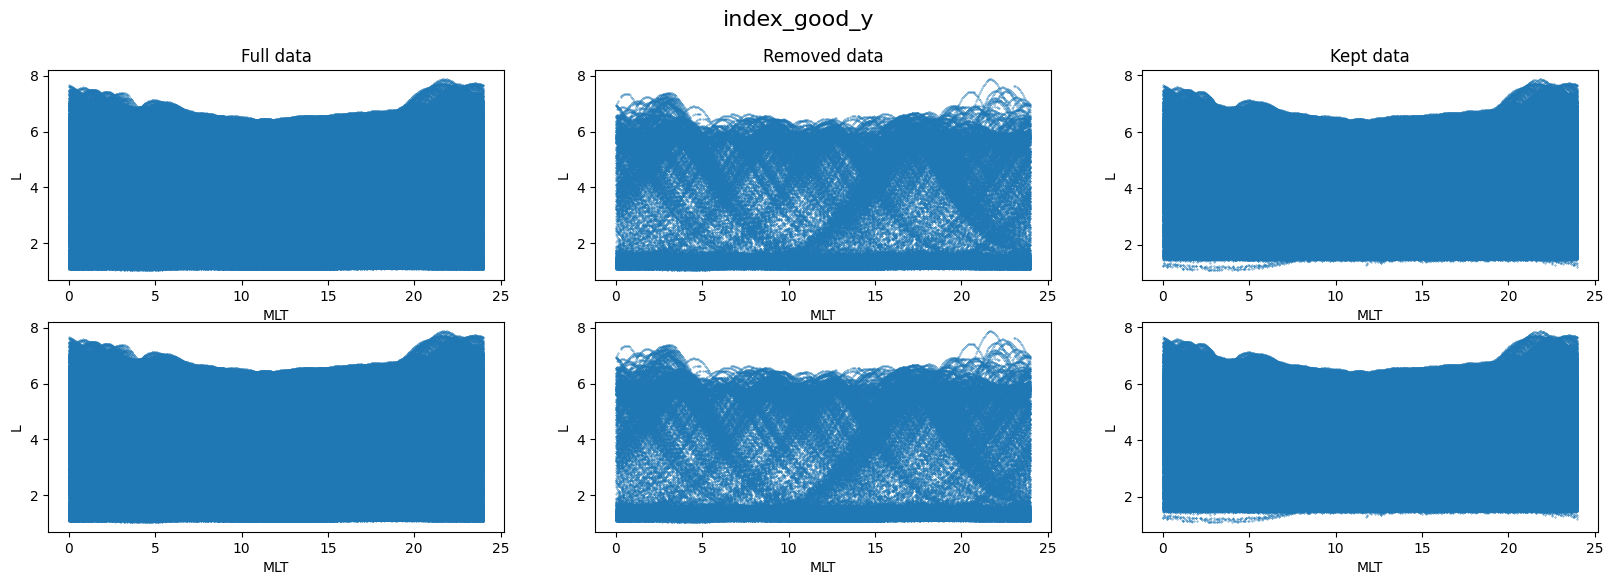

In [86]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 6))

fig.suptitle('index_good_y', fontsize=16)
testing_index = index_good_y

axes[0, 0].scatter(df_full.loc[:, 'mlt'], df_full.loc[:, 'l'], s=0.1)
axes[0, 0].set_title('Full data')
axes[0, 0].set_xlabel('MLT')
axes[0, 0].set_ylabel('L')

axes[0, 1].scatter(df_full.loc[~testing_index, 'mlt'], df_full.loc[~testing_index, 'l'], s=0.1)
axes[0, 1].set_title('Removed data')
axes[0, 1].set_xlabel('MLT')
axes[0, 1].set_ylabel('L')

axes[0, 2].scatter(df_full.loc[testing_index, 'mlt'], df_full.loc[testing_index, 'l'], s=0.1)
axes[0, 2].set_title('Kept data')
axes[0, 2].set_xlabel('MLT')
axes[0, 2].set_ylabel('L')


axes[1, 0].scatter(df_full.loc[:, 'mlt'], df_full.loc[:, 'l'], s=0.1)
axes[1, 0].set_xlabel('MLT')
axes[1, 0].set_ylabel('L')

axes[1, 1].scatter(df_full.loc[~testing_index, 'mlt'], df_full.loc[~testing_index, 'l'], s=0.1)
axes[1, 1].set_xlabel('MLT')
axes[1, 1].set_ylabel('L')

axes[1, 2].scatter(df_full.loc[testing_index, 'mlt'], df_full.loc[testing_index, 'l'], s=0.1)
axes[1, 2].set_xlabel('MLT')
axes[1, 2].set_ylabel('L')

plt.show()

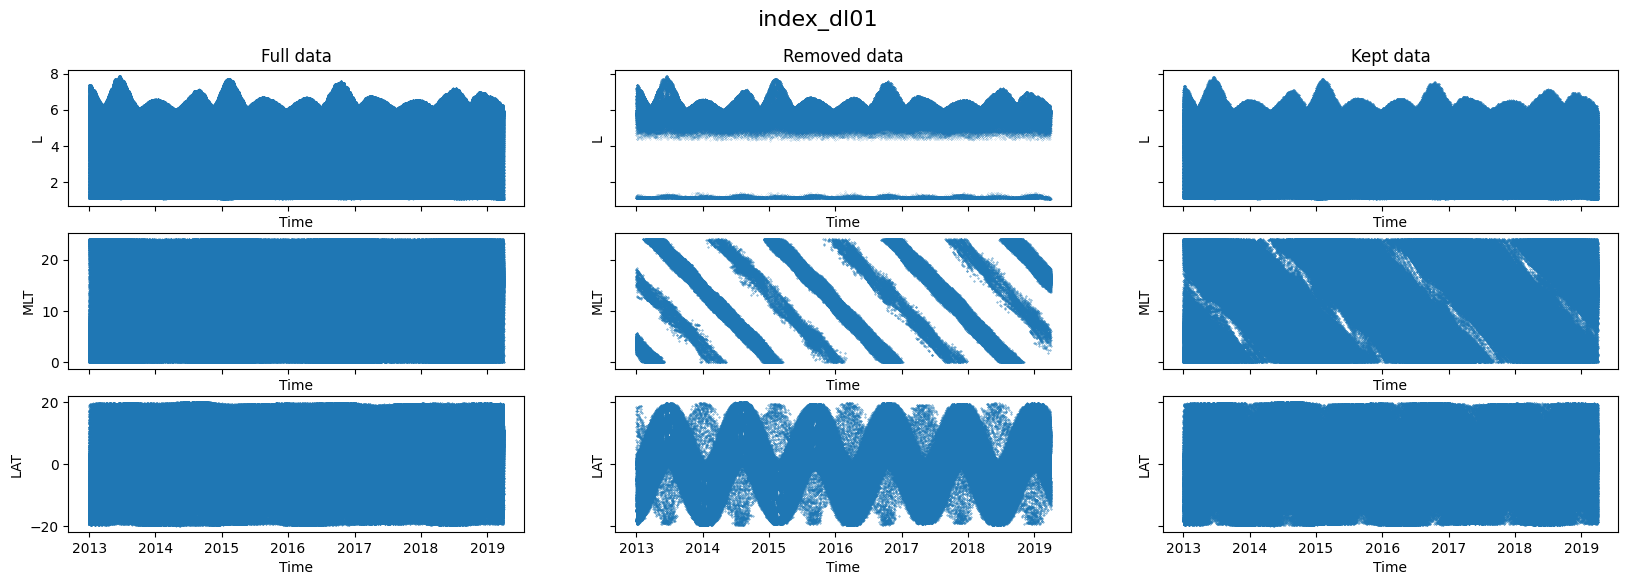

In [87]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(nrows=3, ncols=3,  sharey='row' , sharex='col', figsize=(20, 6))

fig.suptitle('index_dl01', fontsize=16)
testing_index = index_dl01

axes[0, 0].scatter(df_full.loc[:, 'DateTime'], df_full.loc[:, 'l'], s=0.1)
axes[0, 0].set_title('Full data')
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('L')

axes[0, 1].scatter(df_full.loc[~testing_index, 'DateTime'], df_full.loc[~testing_index, 'l'], s=0.01)
axes[0, 1].set_title('Removed data')
axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('L')

axes[0, 2].scatter(df_full.loc[testing_index, 'DateTime'], df_full.loc[testing_index, 'l'], s=0.1)
axes[0, 2].set_title('Kept data')
axes[0, 2].set_xlabel('Time')
axes[0, 2].set_ylabel('L')

axes[1,0].scatter(df_full.loc[:, 'DateTime'], df_full.loc[:, 'mlt'], s=0.1)
axes[1,0].set_xlabel('Time')
axes[1,0].set_ylabel('MLT')

axes[1,1].scatter(df_full.loc[~testing_index, 'DateTime'], df_full.loc[~testing_index, 'mlt'], s=0.1)
axes[1,1].set_xlabel('Time')
axes[1,1].set_ylabel('MLT')

axes[1,2].scatter(df_full.loc[testing_index, 'DateTime'], df_full.loc[testing_index, 'mlt'], s=0.1)
axes[1,2].set_xlabel('Time')
axes[1,2].set_ylabel('MLT')

axes[2,0].scatter(df_full.loc[:, 'DateTime'], df_full.loc[:, 'lat'], s=0.1)
axes[2,0].set_xlabel('Time')
axes[2,0].set_ylabel('LAT')

axes[2,1].scatter(df_full.loc[~testing_index, 'DateTime'], df_full.loc[~testing_index, 'lat'], s=0.1)
axes[2,1].set_xlabel('Time')
axes[2,1].set_ylabel('LAT')

axes[2,2].scatter(df_full.loc[testing_index, 'DateTime'], df_full.loc[testing_index, 'lat'], s=0.1)
axes[2,2].set_xlabel('Time')
axes[2,2].set_ylabel('LAT')

plt.show()




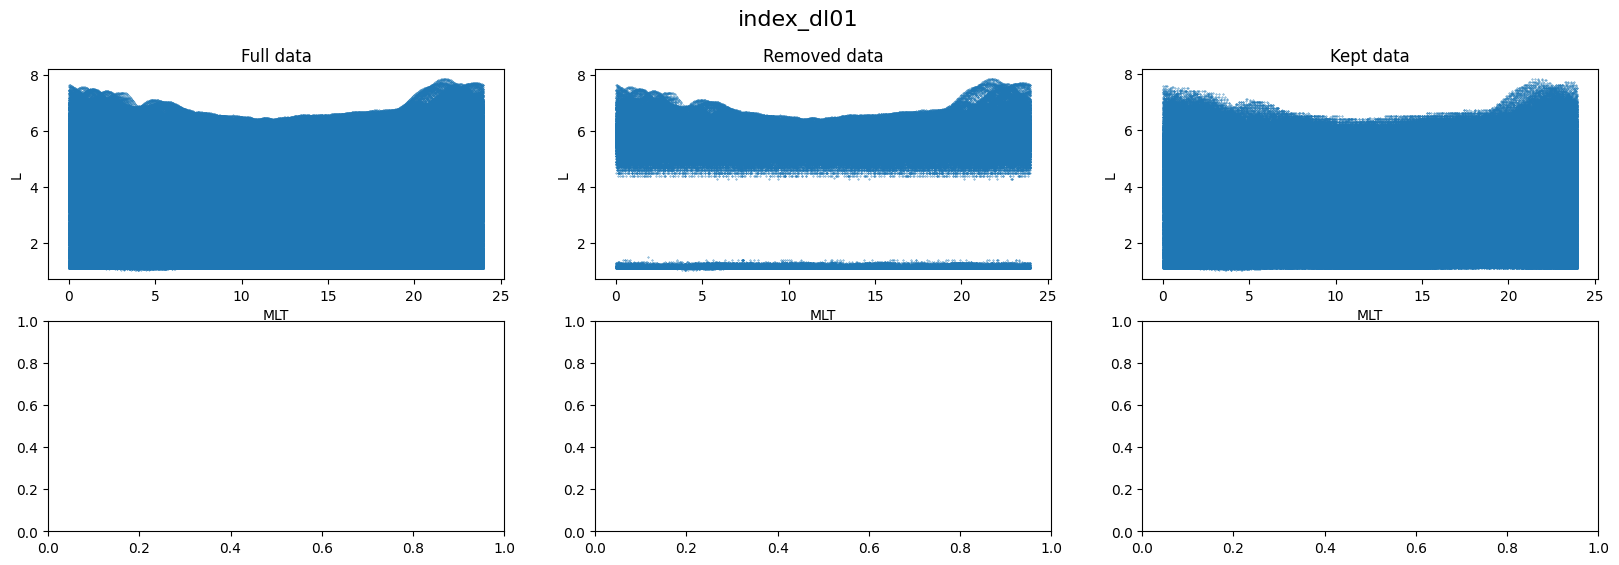

In [83]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 6))

fig.suptitle('index_dl01', fontsize=16)
testing_index = index_dl01

axes[0, 0].scatter(df_full.loc[:, 'mlt'], df_full.loc[:, 'l'], s=0.1)
axes[0, 0].set_title('Full data')
axes[0, 0].set_xlabel('MLT')
axes[0, 0].set_ylabel('L')

axes[0, 1].scatter(df_full.loc[~testing_index, 'mlt'], df_full.loc[~testing_index, 'l'], s=0.1)
axes[0, 1].set_title('Removed data')
axes[0, 1].set_xlabel('MLT')
axes[0, 1].set_ylabel('L')

axes[0, 2].scatter(df_full.loc[testing_index, 'mlt'], df_full.loc[testing_index, 'l'], s=0.1)
axes[0, 2].set_title('Kept data')
axes[0, 2].set_xlabel('MLT')
axes[0, 2].set_ylabel('L')


axes[1, 0].scatter(df_full.loc[:, 'mlt'], df_full.loc[:, 'l'], s=0.1)
axes[1, 0].set_title('Full data')
axes[1, 0].set_xlabel('MLT')
axes[1, 0].set_ylabel('L')

axes[1, 1].scatter(df_full.loc[~testing_index, 'mlt'], df_full.loc[~testing_index, 'l'], s=0.1)
axes[1, 1].set_title('Removed data')
axes[1, 1].set_xlabel('MLT')
axes[1, 1].set_ylabel('L')

axes[1, 2].scatter(df_full.loc[testing_index, 'mlt'], df_full.loc[testing_index, 'l'], s=0.1)
axes[1, 2].set_title('Kept data')
axes[1, 2].set_xlabel('MLT')
axes[1, 2].set_ylabel('L')

plt.show()

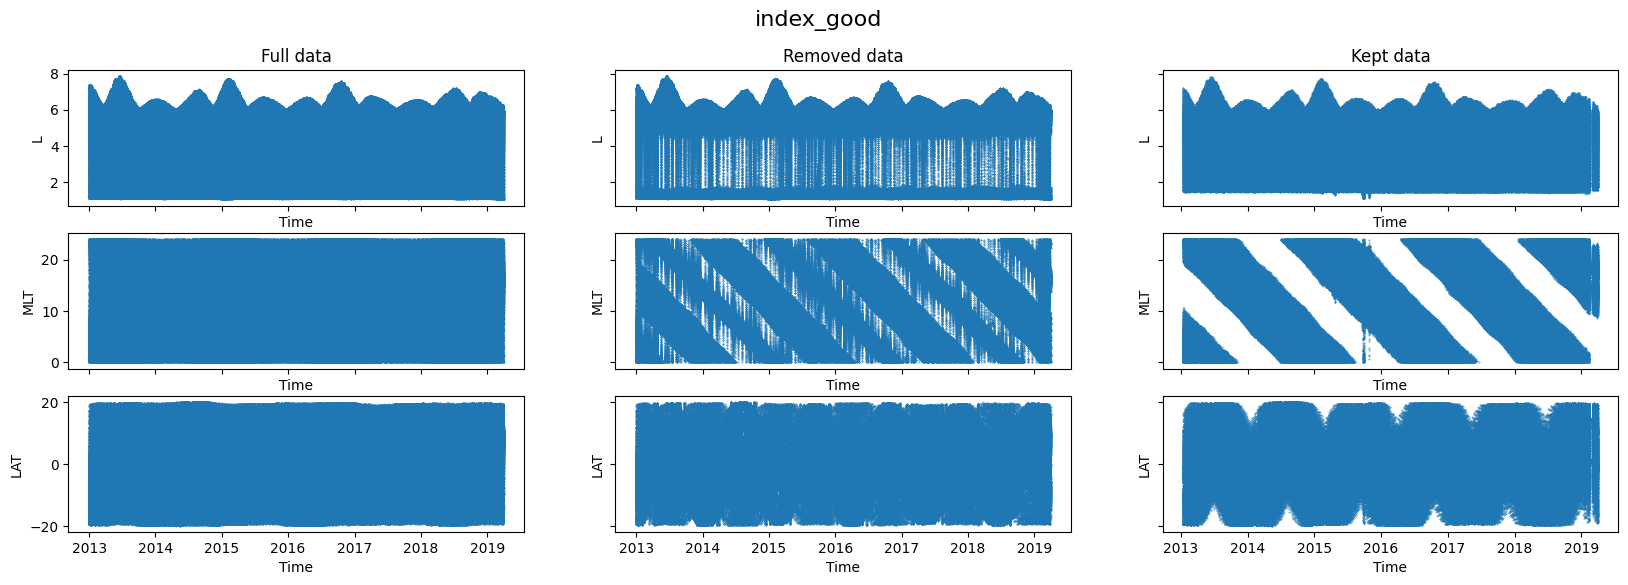

In [74]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(nrows=3, ncols=3,  sharey='row' , sharex='col', figsize=(20, 6))

testing_index = index_good
fig.suptitle('index_good', fontsize=16)

axes[0, 0].scatter(df_full.loc[:, 'DateTime'], df_full.loc[:, 'l'], s=0.1)
axes[0, 0].set_title('Full data')
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('L')

axes[0, 1].scatter(df_full.loc[~testing_index, 'DateTime'], df_full.loc[~testing_index, 'l'], s=0.1)
axes[0, 1].set_title('Removed data')
axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('L')

axes[0, 2].scatter(df_full.loc[testing_index, 'DateTime'], df_full.loc[testing_index, 'l'], s=0.1)
axes[0, 2].set_title('Kept data')
axes[0, 2].set_xlabel('Time')
axes[0, 2].set_ylabel('L')

axes[1,0].scatter(df_full.loc[:, 'DateTime'], df_full.loc[:, 'mlt'], s=0.1)
axes[1,0].set_xlabel('Time')
axes[1,0].set_ylabel('MLT')

axes[1,1].scatter(df_full.loc[~testing_index, 'DateTime'], df_full.loc[~testing_index, 'mlt'], s=0.1)
axes[1,1].set_xlabel('Time')
axes[1,1].set_ylabel('MLT')

axes[1,2].scatter(df_full.loc[testing_index, 'DateTime'], df_full.loc[testing_index, 'mlt'], s=0.1)
axes[1,2].set_xlabel('Time')
axes[1,2].set_ylabel('MLT')

axes[2,0].scatter(df_full.loc[:, 'DateTime'], df_full.loc[:, 'lat'], s=0.1)
axes[2,0].set_xlabel('Time')
axes[2,0].set_ylabel('LAT')

axes[2,1].scatter(df_full.loc[~testing_index, 'DateTime'], df_full.loc[~testing_index, 'lat'], s=0.1)
axes[2,1].set_xlabel('Time')
axes[2,1].set_ylabel('LAT')

axes[2,2].scatter(df_full.loc[testing_index, 'DateTime'], df_full.loc[testing_index, 'lat'], s=0.1)
axes[2,2].set_xlabel('Time')
axes[2,2].set_ylabel('LAT')

plt.show()





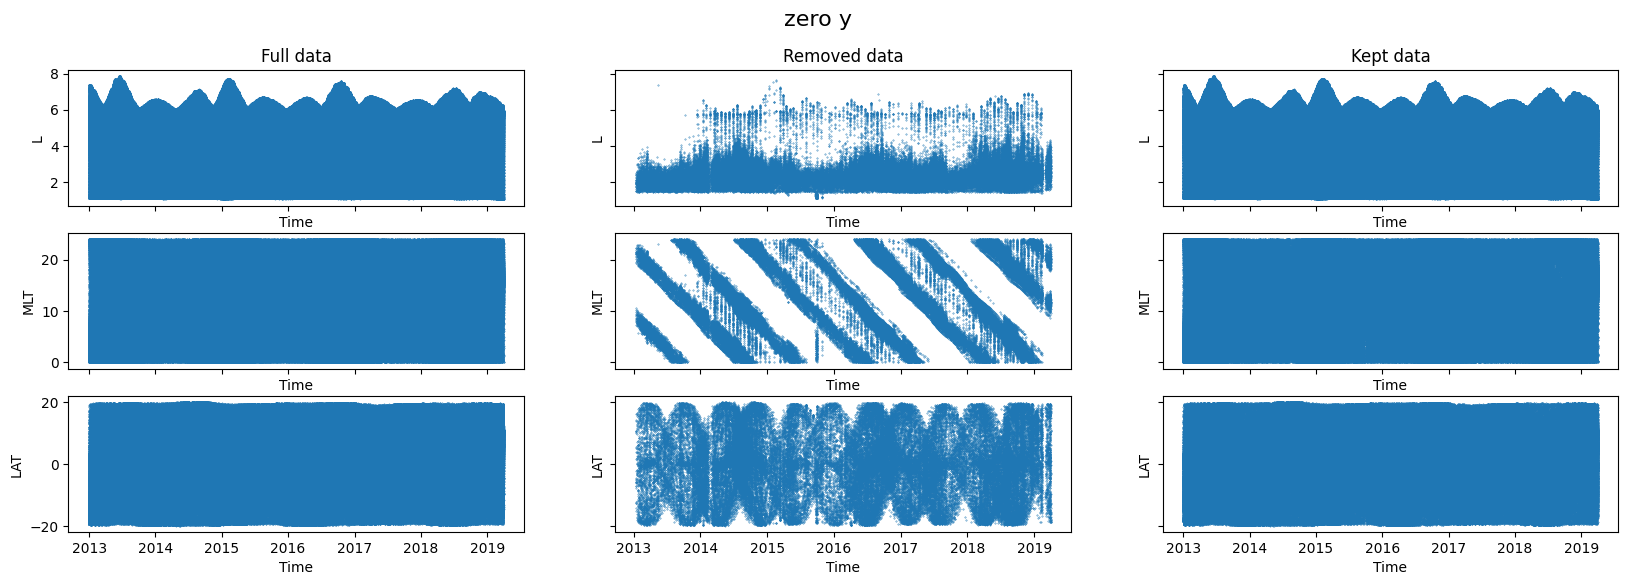

In [77]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(nrows=3, ncols=3,  sharey='row' , sharex='col', figsize=(20, 6))

testing_index = df_full[data_settings["y_name"]] != 0 

fig.suptitle('zero y', fontsize=16)

axes[0, 0].scatter(df_full.loc[:, 'DateTime'], df_full.loc[:, 'l'], s=0.1)
axes[0, 0].set_title('Full data')
axes[0, 0].set_xlabel('Time')
axes[0, 0].set_ylabel('L')

axes[0, 1].scatter(df_full.loc[~testing_index, 'DateTime'], df_full.loc[~testing_index, 'l'], s=0.1)
axes[0, 1].set_title('Removed data')
axes[0, 1].set_xlabel('Time')
axes[0, 1].set_ylabel('L')

axes[0, 2].scatter(df_full.loc[testing_index, 'DateTime'], df_full.loc[testing_index, 'l'], s=0.1)
axes[0, 2].set_title('Kept data')
axes[0, 2].set_xlabel('Time')
axes[0, 2].set_ylabel('L')

axes[1,0].scatter(df_full.loc[:, 'DateTime'], df_full.loc[:, 'mlt'], s=0.1)
axes[1,0].set_xlabel('Time')
axes[1,0].set_ylabel('MLT')

axes[1,1].scatter(df_full.loc[~testing_index, 'DateTime'], df_full.loc[~testing_index, 'mlt'], s=0.1)
axes[1,1].set_xlabel('Time')
axes[1,1].set_ylabel('MLT')

axes[1,2].scatter(df_full.loc[testing_index, 'DateTime'], df_full.loc[testing_index, 'mlt'], s=0.1)
axes[1,2].set_xlabel('Time')
axes[1,2].set_ylabel('MLT')

axes[2,0].scatter(df_full.loc[:, 'DateTime'], df_full.loc[:, 'lat'], s=0.1)
axes[2,0].set_xlabel('Time')
axes[2,0].set_ylabel('LAT')

axes[2,1].scatter(df_full.loc[~testing_index, 'DateTime'], df_full.loc[~testing_index, 'lat'], s=0.1)
axes[2,1].set_xlabel('Time')
axes[2,1].set_ylabel('LAT')

axes[2,2].scatter(df_full.loc[testing_index, 'DateTime'], df_full.loc[testing_index, 'lat'], s=0.1)
axes[2,2].set_xlabel('Time')
axes[2,2].set_ylabel('LAT')

plt.show()





In [ ]:

df_data = df_data.loc[index_good,[fulldata_settings['doubletime_name'], fulldata_settings['datetime_name'],data_settings['y_name'], data_settings['log_y_name']]+ fulldata_settings['coor_names']+fulldata_settings['feature_history_names']]

df_full = df_full.loc[index_good, :]

#-----------------------------
# After this line, both df_data and df_full only have good data. no index_good should be used.

#set test set. Here we use one year (2017) of data for test set 
index_train, index_valid, index_test = prepare_ml_dataset.create_ml_indexes(df_data,  fulldata_settings, data_settings["test_ts"], data_settings["test_te"])

# Each round, one can only train one y. If train more than one y, need to  repeat from here
x_train, x_valid, x_test, y_train, y_valid, y_test = prepare_ml_dataset.create_ml_data(df_data, index_train, index_valid, index_test, data_settings["log_y_name"], fulldata_settings["coor_names"], data_settings["feature_history_names"])  

print("shapes of x_train, x_valid, x_test, y_train, y_valid, y_test ")
print(x_train.shape, x_valid.shape, x_test.shape, y_train.shape, y_valid.shape, y_test.shape)

# if save_data:
#     prepare_ml_dataset.save_df_data(df_full[[fulldata_settings['datetime_name'], data_settings["y_name"]] + fulldata_settings["raw_coor_names"] + fulldata_settings["raw_feature_names"]], index_train, index_valid, index_test, dataset_csv)

#     prepare_ml_dataset.save_csv_data(x_train, x_valid, x_test, y_train, y_valid, y_test , dataset_csv)

# if plot_data:
#     prepare_ml_dataset.plot_y_data(df_data[ [ fulldata_settings['datetime_name'],  data_settings["y_name"],data_settings["log_y_name"]]], data_settings["y_name"],data_settings["log_y_name"],  fulldata_settings['datetime_name'], dataset_csv["df_y"]+ '_'+ data_settings["log_y_name"])
    
#     prepare_ml_dataset.plot_coor_data(df_data[[fulldata_settings['datetime_name']]+fulldata_settings["coor_names"]], fulldata_settings["coor_names"],  fulldata_settings['datetime_name'], dataset_csv["df_coor"])

#     to_plot_feature_name = [s + "_2h" for s in fulldata_settings["feature_names"]]
#     prepare_ml_dataset.plot_feature_data(df_data[[fulldata_settings['datetime_name']] + to_plot_feature_name], to_plot_feature_name, fulldata_settings['datetime_name'], dataset_csv["df_feature"])
